In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [3]:
df1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900


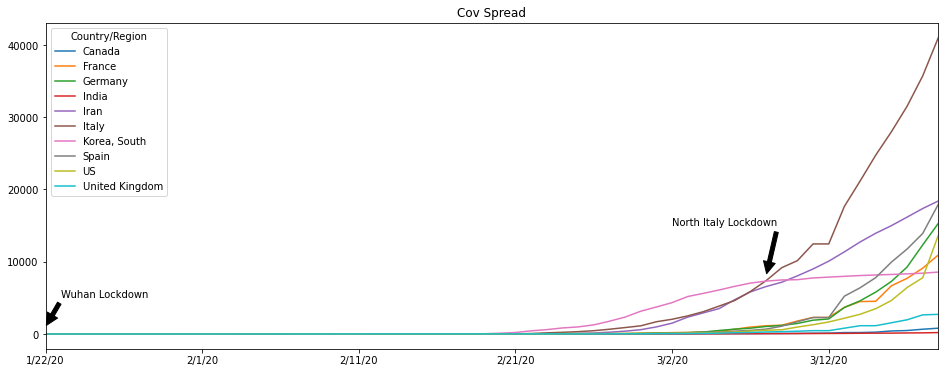

In [4]:
countries = ['Canada', 'US', 'Italy', 'Spain', 'Germany', 'United Kingdom', 'Iran', 'India', 'Korea, South', 'France']

f1 = df1['Country/Region'].isin(countries)
data = df1.loc[f1,:].drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum()

fig, ax = plt.subplots(figsize=(16,6))
data.T.plot(ax=ax)
plt.title('Cov Spread')

plt.annotate('Wuhan Lockdown', xy=(0, 1000), xytext=(1, 5000),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('North Italy Lockdown', xy=(46, 8000), xytext=(40, 15000),
            arrowprops=dict(facecolor='black', shrink=0.05))

#plt.savefig('Cov Spread.png')

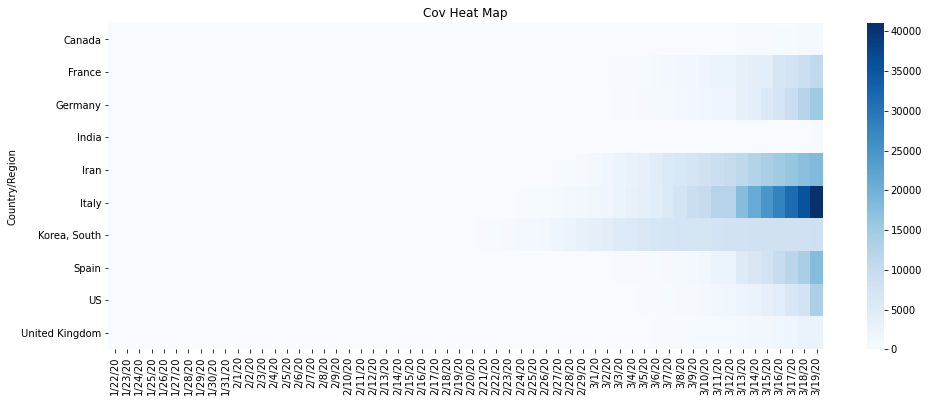

In [5]:
fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(data, ax = ax, cmap='Blues')
plt.title('Cov Heat Map')
#plt.savefig('Cov Heat Map.png')

In [0]:
top10 = df1.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().sort_values('3/19/20', ascending=False).head(10).index.values

Text(40, 15000, 'North Italy Lockdown')

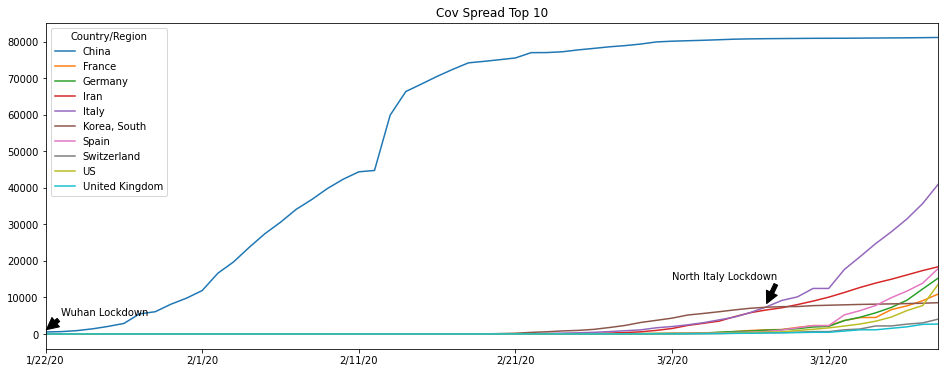

In [23]:
f2 = df1['Country/Region'].isin(top10)
data = df1.loc[f2,:].drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum()

fig, ax = plt.subplots(figsize=(16,6))
data.T.plot(ax=ax)
plt.title('Cov Spread Top 10')

plt.annotate('Wuhan Lockdown', xy=(0, 1000), xytext=(1, 5000),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('North Italy Lockdown', xy=(46, 8000), xytext=(40, 15000),
            arrowprops=dict(facecolor='black', shrink=0.05))

#plt.savefig('Cov Spread.png')